# Project:-Student Alcohol prediction and EDA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
math = pd.read_csv('student-mat.csv')
por = pd.read_csv("student-por.csv")

In [4]:
math.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
len(math)

395

In [6]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
len(por)

649

In [8]:
math.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)

In [9]:
por.rename(columns={'G1':'G1_Por', 'G2':'G2_Por', 'G3':'G3_Por'}, inplace=True)

In [10]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat'],
      dtype='object')

In [11]:
# Students with grades in Math and Portuguese
both = pd.merge(math, por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])
both = both.drop_duplicates()

In [12]:
len(both)

85

In [13]:
por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_Por        0
G2_Por        0
G3_Por        0
dtype: int64

In [14]:
por.school.value_counts(normalize=True)

GP    0.651772
MS    0.348228
Name: school, dtype: float64

In [15]:
print("%s%% of the students are in Gabriel Pereira school" % (100*round(por.school.value_counts(normalize=True)[0],4)))

65.18% of the students are in Gabriel Pereira school


In [16]:
por.sex.value_counts(normalize=True)

F    0.590139
M    0.409861
Name: sex, dtype: float64

In [17]:
print("%s%% of the students are girls" % (100*round(por.sex.value_counts(normalize=True)[0],4)))

59.01% of the students are girls


In [18]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=por)

NameError: name 'sns' is not defined

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

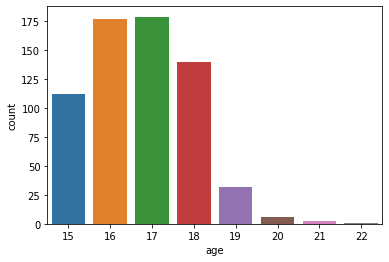

In [21]:
sns.countplot(por.age)

In [22]:
por.address.value_counts(normalize=True)

U    0.696456
R    0.303544
Name: address, dtype: float64

In [23]:
print("%s%% of the students live in an urban area" % (100*round(por.address.value_counts(normalize=True)[0],4)))

69.65% of the students live in an urban area


In [24]:
por.famsize.value_counts(normalize=True)

GT3    0.70416
LE3    0.29584
Name: famsize, dtype: float64

In [25]:
print("%s%% of the students live in a family with more than 3 members" % (100*round(por.famsize.value_counts(normalize=True)[0],4)))

70.42% of the students live in a family with more than 3 members


<AxesSubplot:xlabel='school', ylabel='count'>

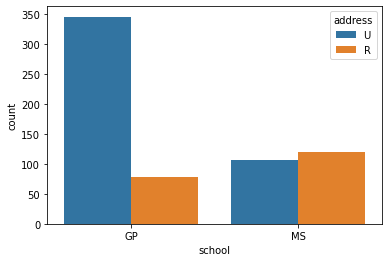

In [26]:
sns.countplot(x="school", hue ="address", data=por)

In [27]:
por.Pstatus.value_counts(normalize=True)

T    0.876733
A    0.123267
Name: Pstatus, dtype: float64

In [28]:
print("%s%% of the students' parents live together" % (100*round(por.Pstatus.value_counts(normalize=True)[0],4)))

87.67% of the students' parents live together


<AxesSubplot:xlabel='Pstatus', ylabel='count'>

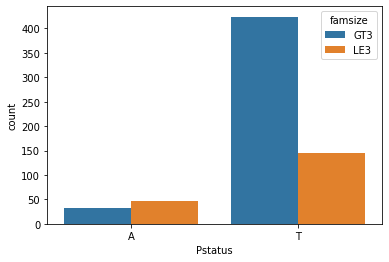

In [29]:
sns.countplot(x="Pstatus", hue ="famsize", data=por)

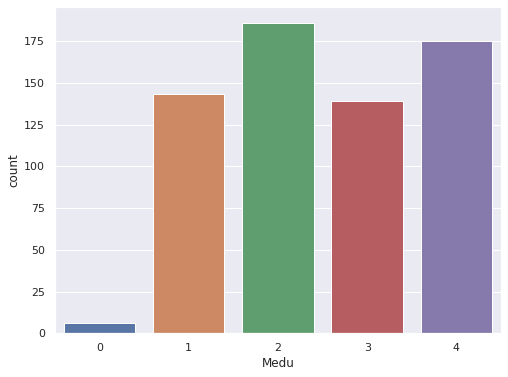

In [27]:
sns.countplot(por.Medu)

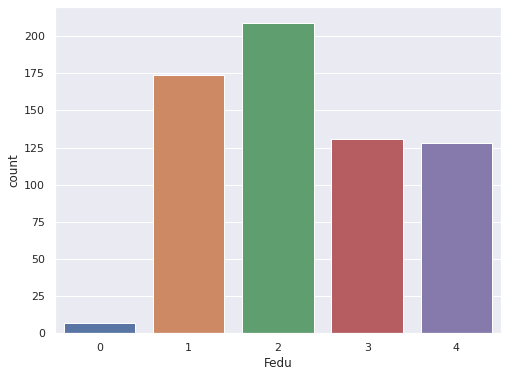

In [28]:
sns.countplot(por.Fedu)

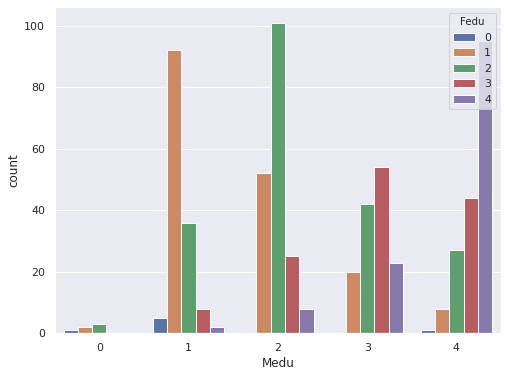

In [29]:
sns.countplot(x="Medu", hue ="Fedu", data=por)

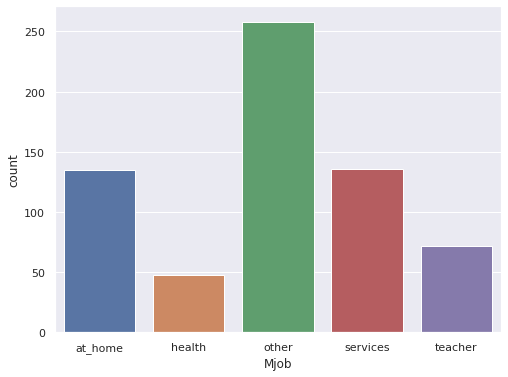

In [30]:
sns.countplot(por.Mjob)

In [31]:
por.Mjob.value_counts(normalize=True)

other       0.397535
services    0.209553
at_home     0.208012
teacher     0.110940
health      0.073960
Name: Mjob, dtype: float64

In [32]:
print("%s%% of the mothers are at home" % (100*round(por.Mjob.value_counts(normalize=True)[2],4)))

20.8% of the mothers are at home


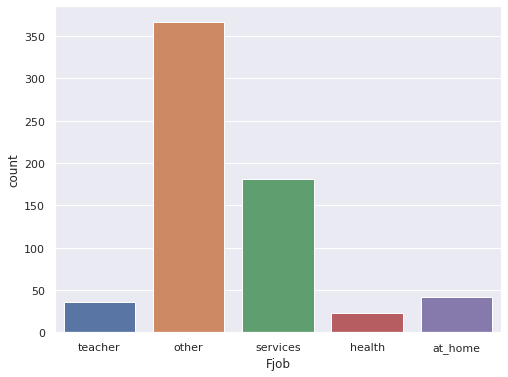

In [33]:
sns.countplot(por.Fjob)

In [34]:
por.Fjob.value_counts(normalize=True)

other       0.565485
services    0.278891
at_home     0.064715
teacher     0.055470
health      0.035439
Name: Fjob, dtype: float64

In [35]:
print("%s%% of the fathers are at home" % (100*round(por.Fjob.value_counts(normalize=True)[2],4)))

6.47% of the fathers are at home


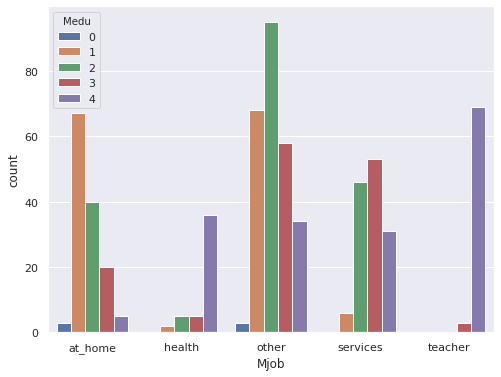

In [36]:
sns.countplot(x="Mjob", hue ="Medu", data=por)

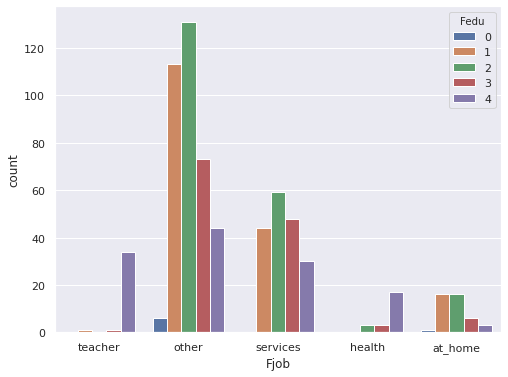

In [37]:
sns.countplot(x="Fjob", hue ="Fedu", data=por)

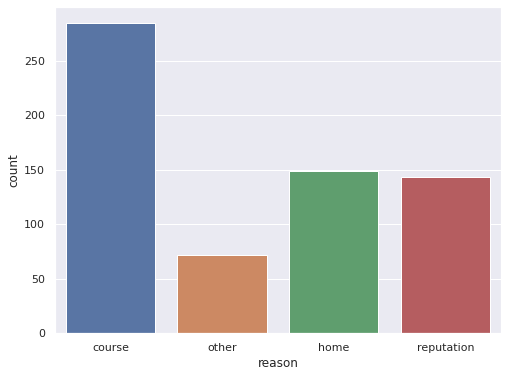

In [38]:
sns.countplot(por.reason)

In [39]:
por.guardian.value_counts(normalize=True)

mother    0.701079
father    0.235747
other     0.063174
Name: guardian, dtype: float64

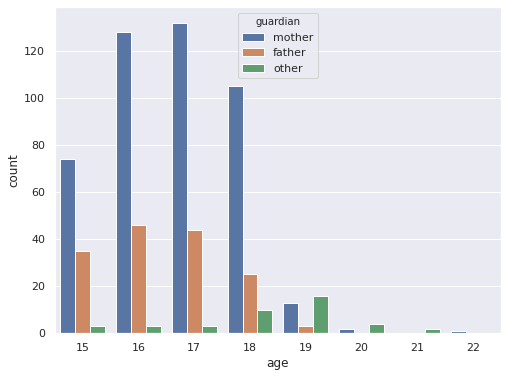

In [40]:
sns.countplot(x="age", hue ="guardian", data=por)

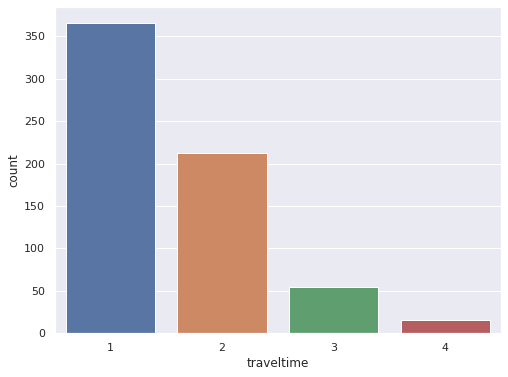

In [41]:
sns.countplot(por.traveltime)

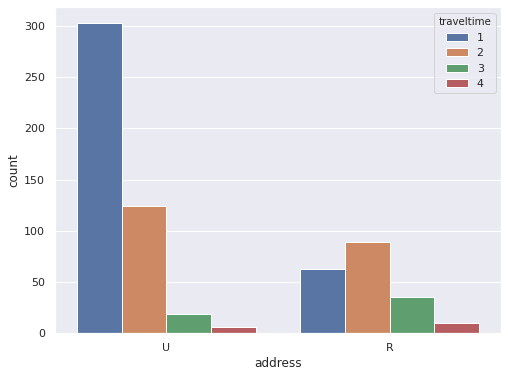

In [42]:
sns.countplot(x="address", hue ="traveltime", data=por)

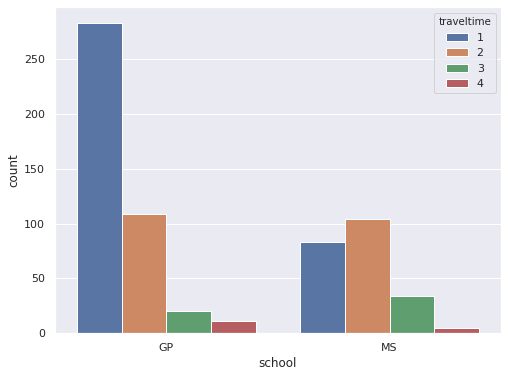

In [43]:
sns.countplot(x="school", hue ="traveltime", data=por)

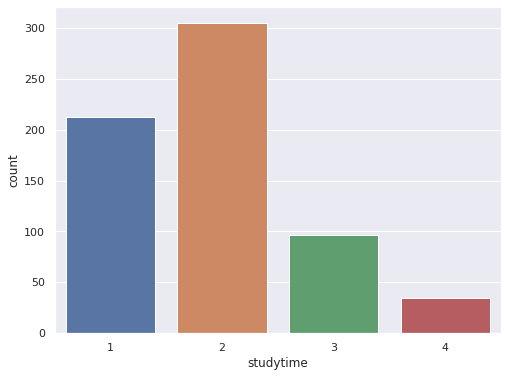

In [44]:
sns.countplot(por.studytime)

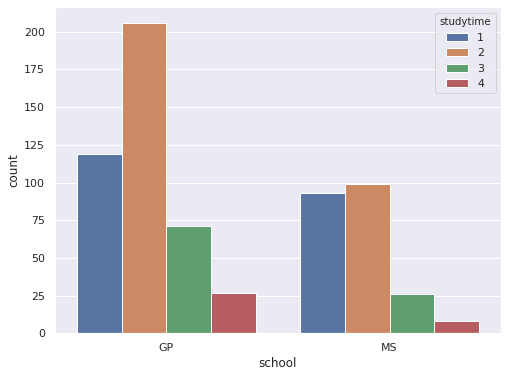

In [45]:
sns.countplot(x="school", hue ="studytime", data=por)

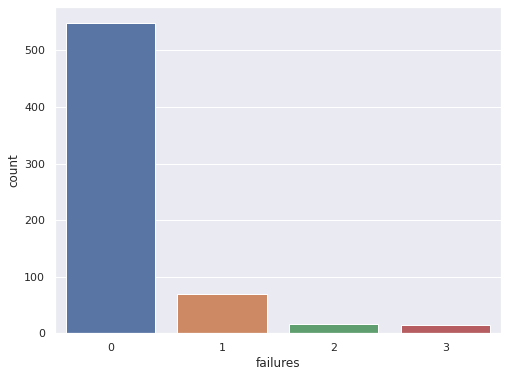

In [46]:
sns.countplot(por.failures)

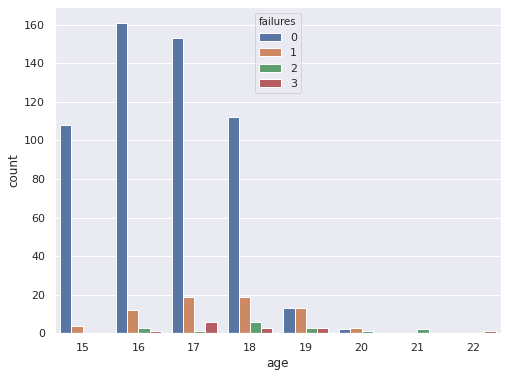

In [47]:
sns.countplot(x="age", hue="failures", data=por)

In [48]:
por.schoolsup.value_counts(normalize=True)

no     0.895223
yes    0.104777
Name: schoolsup, dtype: float64

In [49]:
por.famsup.value_counts(normalize=True)

yes    0.613251
no     0.386749
Name: famsup, dtype: float64

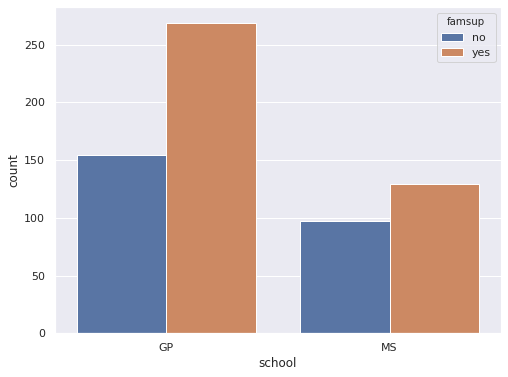

In [50]:
sns.countplot(x="school", hue="famsup", data=por)

In [51]:
por.paid.value_counts(normalize=True)

no     0.939908
yes    0.060092
Name: paid, dtype: float64

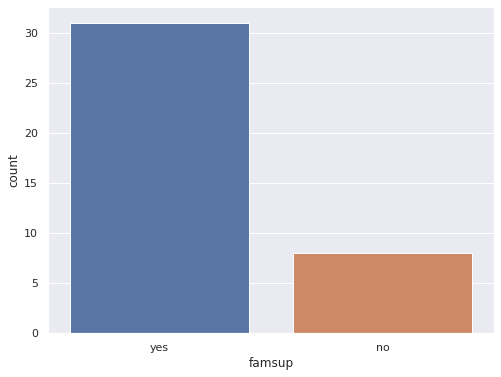

In [52]:
sns.countplot(por[por.paid == 'yes']['famsup'])

In [53]:
por.activities.value_counts(normalize=True)

no     0.514638
yes    0.485362
Name: activities, dtype: float64

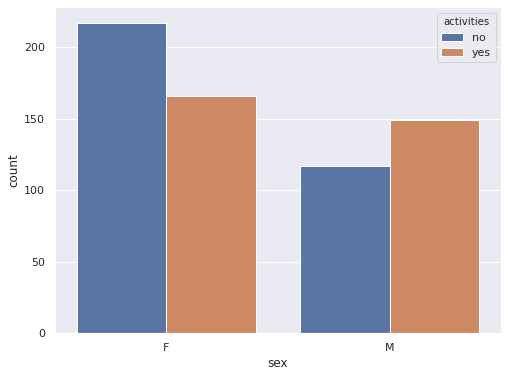

In [54]:
sns.countplot(x="sex", hue="activities", data=por)

In [55]:
por.nursery.value_counts(normalize=True)

yes    0.802773
no     0.197227
Name: nursery, dtype: float64

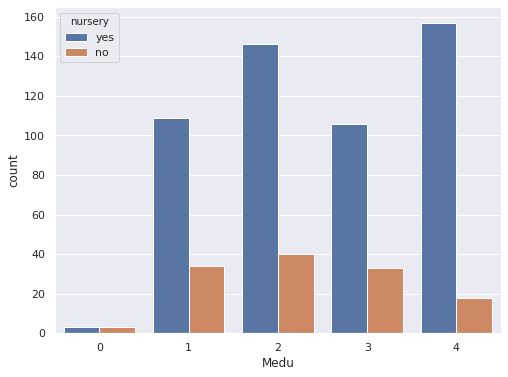

In [56]:
sns.countplot(x="Medu", hue="nursery", data=por)

In [57]:
por.higher.value_counts(normalize=True)

yes    0.893683
no     0.106317
Name: higher, dtype: float64

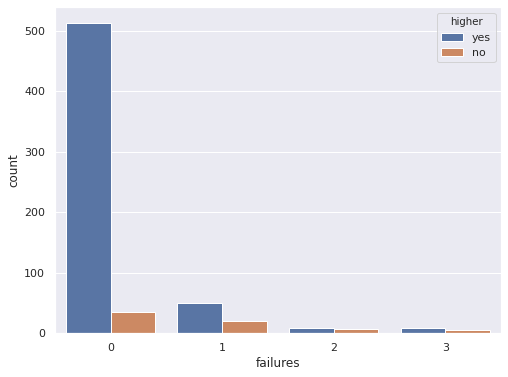

In [58]:
sns.countplot(x="failures", hue="higher", data=por)

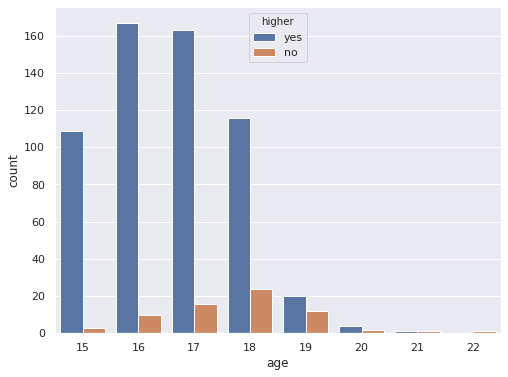

In [59]:
sns.countplot(x="age", hue="higher", data=por)

In [60]:
por.internet.value_counts(normalize=True)

yes    0.767334
no     0.232666
Name: internet, dtype: float64

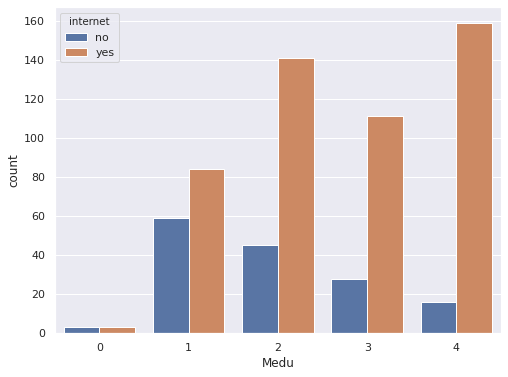

In [61]:
sns.countplot(x="Medu", hue="internet", data=por)

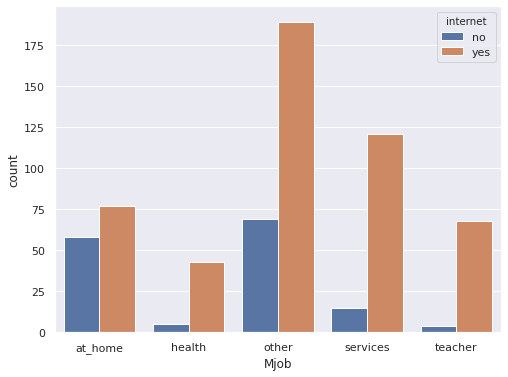

In [62]:
sns.countplot(x="Mjob", hue="internet", data=por)

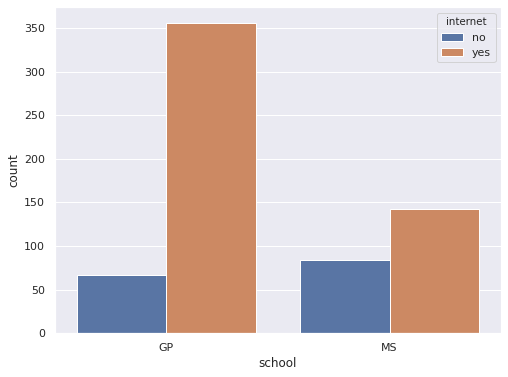

In [63]:
sns.countplot(x="school", hue="internet", data=por)

In [64]:
por.romantic.value_counts(normalize=True)

no     0.631741
yes    0.368259
Name: romantic, dtype: float64

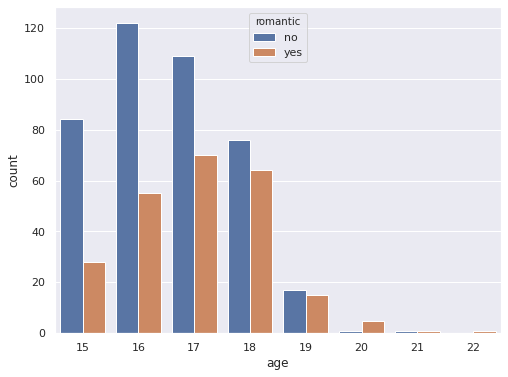

In [65]:
sns.countplot(x="age", hue="romantic", data=por)

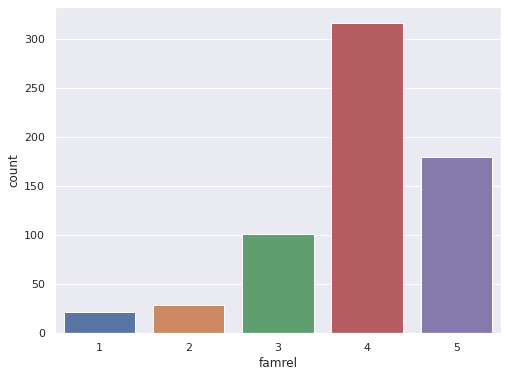

In [66]:
sns.countplot(por.famrel)

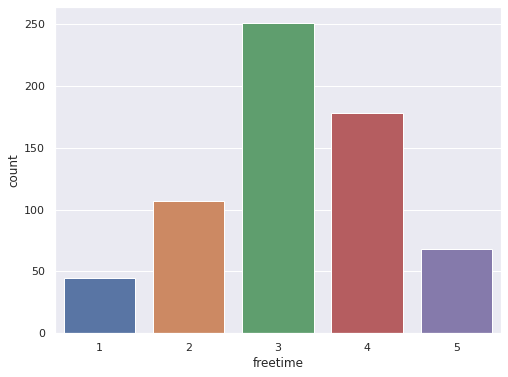

In [67]:
sns.countplot(por.freetime)

In [68]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


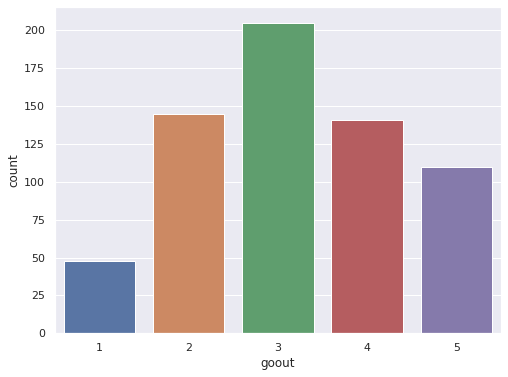

In [69]:
sns.countplot(por.goout)

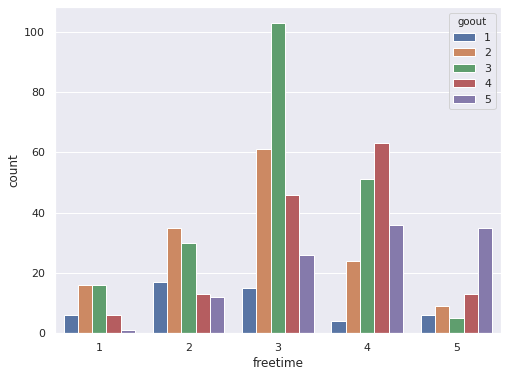

In [70]:
sns.countplot(x="freetime", hue="goout", data=por)

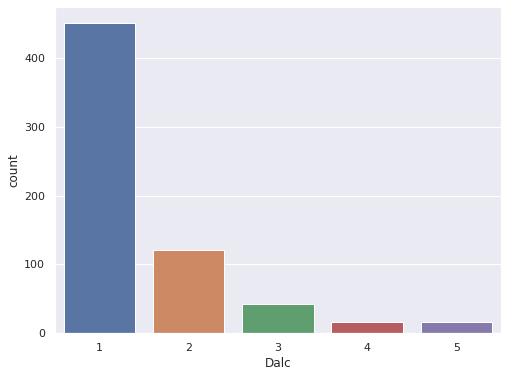

In [71]:
sns.countplot(por.Dalc)

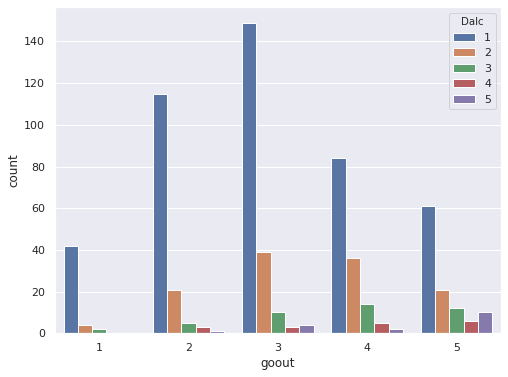

In [72]:
sns.countplot(x="goout", hue="Dalc", data=por)

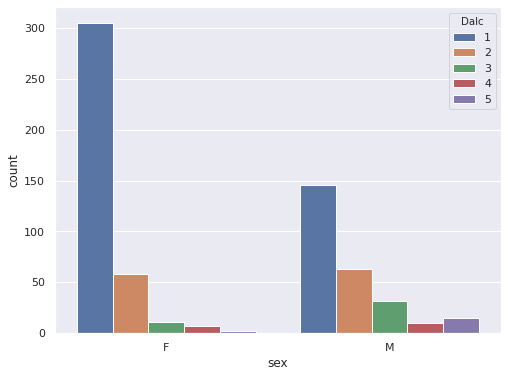

In [73]:
sns.countplot(x="sex", hue="Dalc", data=por)

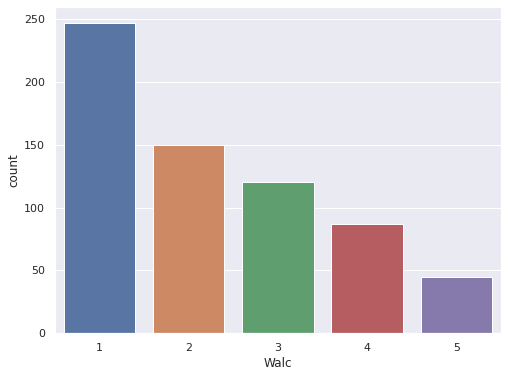

In [74]:
sns.countplot(por.Walc)

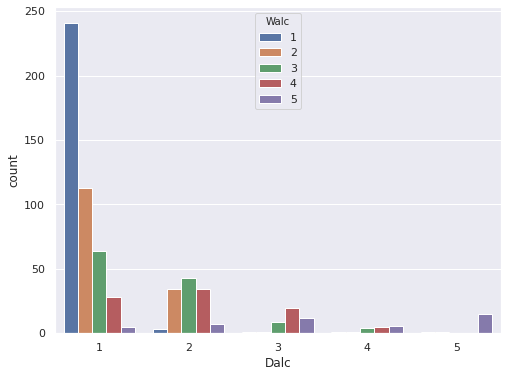

In [75]:
sns.countplot(x="Dalc", hue="Walc", data=por)

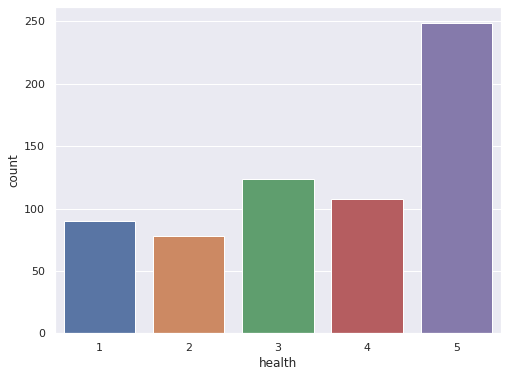

In [76]:
sns.countplot(por.health)

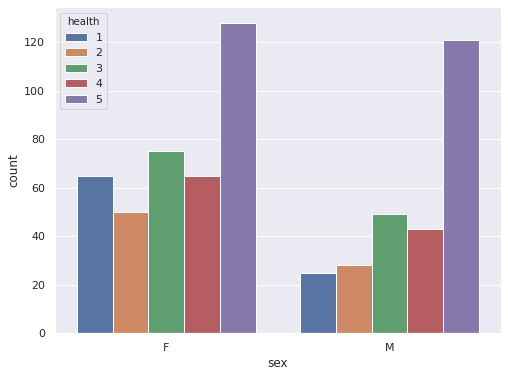

In [77]:
sns.countplot(x="sex", hue="health", data=por)

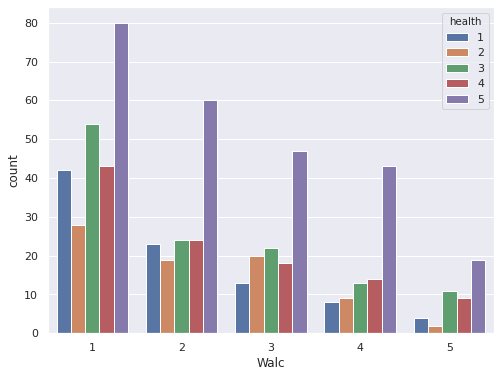

In [78]:
sns.countplot(x="Walc", hue="health", data=por)

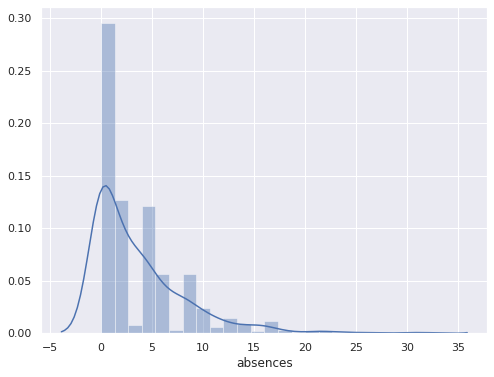

In [79]:
sns.distplot(por.absences)

In [80]:
por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Por', 'G2_Por', 'G3_Por'],
      dtype='object')

In [81]:
por['Total_Grades'] = por['G1_Por'] + por['G2_Por'] + por['G3_Por']

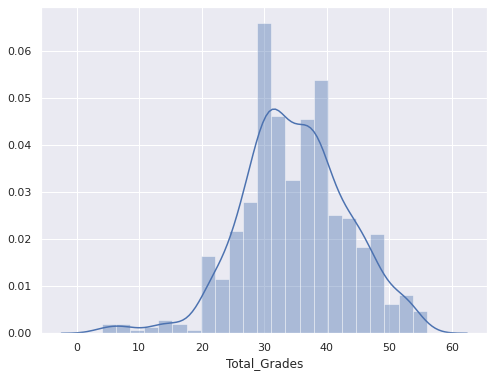

In [82]:
sns.distplot(por.Total_Grades)

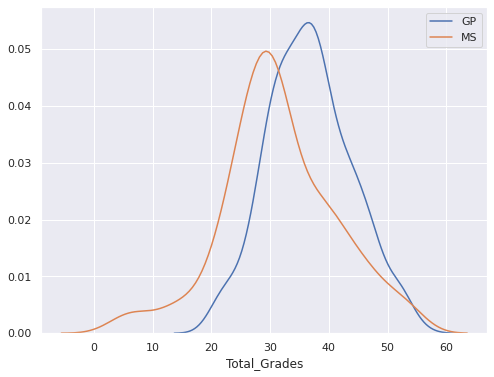

In [83]:
GP = por[por.school == 'GP']
MS = por[por.school == 'MS']

sns.distplot(GP.Total_Grades, hist=False, label="GP")
sns.distplot(MS.Total_Grades, hist=False, label="MS")
plt.show()

### Data Cleaning

In [84]:
por['school'] = por['school'].map({'GP': 0, 'MS': 1}).astype(int)
por['sex'] = por['sex'].map({'M': 0, 'F': 1}).astype(int)
por['address'] = por['address'].map({'R': 0, 'U': 1}).astype(int)
por['famsize'] = por['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
por['Pstatus'] = por['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
por['Mjob'] = por['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['Fjob'] = por['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['reason'] = por['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
por['guardian'] = por['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
por['schoolsup'] = por['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
por['famsup'] = por['famsup'].map({'no': 0, 'yes': 1}).astype(int)
por['paid'] = por['paid'].map({'no': 0, 'yes': 1}).astype(int)
por['activities'] = por['activities'].map({'no': 0, 'yes': 1}).astype(int)
por['nursery'] = por['nursery'].map({'no': 0, 'yes': 1}).astype(int)
por['higher'] = por['higher'].map({'no': 0, 'yes': 1}).astype(int)
por['internet'] = por['internet'].map({'no': 0, 'yes': 1}).astype(int)
por['romantic'] = por['romantic'].map({'no': 0, 'yes': 1}).astype(int)

In [85]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por,Total_Grades
0,0,1,18,1,1,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,22
1,0,1,17,1,1,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,31
2,0,1,15,1,0,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,37
3,0,1,15,1,1,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,42
4,0,1,16,1,1,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,37


### Grades Prediction

In [86]:
por.corr()['Total_Grades'].sort_values(ascending=False)

Total_Grades    1.000000
G2_Por          0.971256
G3_Por          0.961829
G1_Por          0.933554
higher          0.352762
Medu            0.265905
studytime       0.261630
Fedu            0.227918
reason          0.193178
Mjob            0.167727
address         0.167455
internet        0.152914
sex             0.118333
Fjob            0.085200
activities      0.071621
famrel          0.070550
famsup          0.047932
nursery         0.034661
Pstatus         0.011045
guardian       -0.041477
famsize        -0.045694
paid           -0.052771
schoolsup      -0.067830
health         -0.082420
goout          -0.084467
romantic       -0.092213
freetime       -0.113723
absences       -0.125015
age            -0.133499
traveltime     -0.151066
Walc           -0.173906
Dalc           -0.205792
school         -0.295035
failures       -0.405815
Name: Total_Grades, dtype: float64

In [87]:
grades_corr = por.corr()['Total_Grades']

### Traing and testing model